# SkinSeoul Product Strategy – Data Analysis Notebook

This notebook analyzes 10 skincare products using revenue, cost, pricing, and competition data. It aims to support pricing and promotion strategies for SkinSeoul.

---

## 1. Setup and Imports

We begin by importing libraries for data extraction (from PDF), analysis, and visualization.

In [1]:
# Import libraries for data handling and visualization
import pandas as pd
import pdfplumber
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 

## 2. Extract Data from PDF

Using `pdfplumber`, we extract two-part tabular data (headers on page 1, remaining rows on page 2) and structure it into a clean `pandas` DataFrame.

In [2]:
pdf_path = "[SkinSeoul]Competency Assessment - Data Analyst.pdf"

with pdfplumber.open(pdf_path) as pdf:
    # Extract headers + part 1 of the table
    tables1 = pdf.pages[0].extract_tables()
    first_table = tables1[0]
    raw_headers = first_table[0]
    rows1 = first_table[1:]

    # Extract part 2 of the table (no headers)
    tables2 = pdf.pages[1].extract_tables()
    rows2 = tables2[0]  # Only data, no header

# Combine all rows
all_rows = rows1 + rows2

# Clean headers: replace \n with space
clean_headers = [col.replace("\n", " ").strip() for col in raw_headers]

# Clean cell values in all rows
clean_rows = [[cell.replace("\n", " ").strip() for cell in row] for row in all_rows]

# Build DataFrame
df = pd.DataFrame(clean_rows, columns=clean_headers)

Could get FontBBox from font descriptor because None cannot be parsed as 4 floats
Could get FontBBox from font descriptor because None cannot be parsed as 4 floats
Could get FontBBox from font descriptor because None cannot be parsed as 4 floats


## 3. Data Cleaning and Derived Metrics

We convert all numeric fields, calculate profit-related features, simulate price adjustments, and evaluate their financial impact.

In [3]:
columns_to_numeric = ['Price (USD)', 'Cost Price (USD)', 'Units Sold', 'Revenue (USD)', 'Stock Availability (Days)', 'Competitor Price (USD)']

# Convert numeric columns from string to float
df[columns_to_numeric] = df[columns_to_numeric].apply(pd.to_numeric)

# Calculate profit metrics
df['Profit (USD)'] = df['Price (USD)'] - df['Cost Price (USD)']
df['Net Profit (USD)'] = df['Profit (USD)'] * df['Units Sold']
df["Profit Margin (%)"] = (df["Profit (USD)"] / df["Price (USD)"]) * 100
df['Price Difference'] = df['Price (USD)'] - df['Competitor Price (USD)']
df = df.sort_values(by='Net Profit (USD)', ascending=False).reset_index(drop=True)

# Simulated new prices for strategic evaluation
df['New Price (USD)'] = [19, 27, 22, 22, 29, 34, 26, 38, 33, 43]
df['New Net Profit (USD)'] = (df['New Price (USD)'] - df['Cost Price (USD)']) * df['Units Sold']
df['New Revenue (USD)'] = df['New Price (USD)'] * df['Units Sold']
df['New Profit Margin (%)'] = (df['New Price (USD)'] - df['Cost Price (USD)']) / df['New Price (USD)'] * 100
df['New Price Difference'] = df['New Price (USD)'] - df['Competitor Price (USD)']

# Reorder columns for clarity
columns_order = ['Product Name', 'Brand', 'Revenue (USD)','New Revenue (USD)', 'Cost Price (USD)', 'Price (USD)', 'New Price (USD)', 'Competitor Price (USD)', 'Price Difference', 'New Price Difference', 'Profit (USD)', 'Units Sold', 'Net Profit (USD)', 'New Net Profit (USD)', 'Stock Availability (Days)', 'Profit Margin (%)',  'New Profit Margin (%)']
df = df[columns_order]

## 4. Preview Final Dataset

Below is the enriched DataFrame with all calculated fields, sorted by Net Profit.

In [4]:
df

,Product Name,Brand,Revenue (USD),New Revenue (USD),Cost Price (USD),Price (USD),New Price (USD),Competitor Price (USD),Price Difference,New Price Difference,Profit (USD),Units Sold,Net Profit (USD),New Net Profit (USD),Stock Availability (Days),Profit Margin (%),New Profit Margin (%)
0,Snail Repair Cream,Mizon,41400,43700,11,18,19,20,-2,-1,7,2300,16100,18400,9,38.888889,42.105263
1,Deep Moist Cream,Pyunkang Yul,39000,40500,16,26,27,28,-2,-1,10,1500,15000,16500,7,38.461538,40.740741
2,Centella Soothing Gel,Purito,35200,35200,13,22,22,22,0,0,9,1600,14400,14400,18,40.909091,40.909091
3,Collagen Elastic Cream,Etude House,37800,39600,13,21,22,22,-1,0,8,1800,14400,16200,6,38.095238,40.909091
4,Ceramide Moisture Balm,Illiyoon,36400,37700,17,28,29,30,-2,-1,11,1300,14300,15600,10,39.285714,41.379310
5,Honey Glow Cream,I'm From,33250,32300,21,35,34,34,1,0,14,950,13300,12350,16,40.000000,38.235294
6,AHA Hydration Cream,COSRX,27500,28600,15,25,26,27,-2,-1,10,1100,11000,12100,12,40.000000,42.307692
7,Ultra Barrier Cream,Dr. Jart+,26000,24700,24,40,38,38,2,0,16,650,10400,9100,20,40.000000,36.842105
8,Propolis Recovery Cream,Dr. Ceuracle,25600,26400,19,32,33,34,-2,-1,13,800,10400,11200,11,40.625000,42.424242
9,Water Bank Blue Hyaluronic Cream,Laneige,24750,23650,27,45,43,43,2,0,18,550,9900,8800,26,40.000000,37.209302


## 5. Current Overall Margin

We compute the overall profit margin based on original prices and compare this later with simulated new prices.

In [5]:
total_revenue = df['Revenue (USD)'].sum()
total_net_profit = df['Net Profit (USD)'].sum()
overall_profit_margin = (total_net_profit / total_revenue) * 100
print(f"Current Overall Profit Margin: {overall_profit_margin} %")

Current Overall Profit Margin: 39.52278984398899 %


## 6. Correlation Analysis: Price vs Sales Volume

We test if underpricing (relative to competitors) leads to higher sales.

- `Price Difference = Our Price – Competitor Price`
- Pearson correlation (r) helps quantify the relationship.

Negative correlation would support the idea that **being cheaper → more units sold**.

In [6]:
from scipy.stats import pearsonr

r, p = pearsonr(df["Price Difference"], df["Units Sold"])
print(f"Pearson r = {r}, p = {p}")

Pearson r = -0.5766669564327688, p = 0.080959912423319


## 7. Correlation Analysis: Sales Volume vs Stock Days Left

This test checks whether **high-selling products are at risk of stockout**.

A negative correlation would indicate **popular items have fewer days left in stock**, flagging a potential replenishment need.

In [7]:
from scipy.stats import pearsonr

r, p = pearsonr(df["Units Sold"], df["Stock Availability (Days)"])
print(f"Pearson r = {r}, p = {p}")

Pearson r = -0.6663614715626902, p = 0.035379803620063974


## 8. Projected Overall Profit Margin (After Price Adjustments)

We calculate the **overall net profit margin** using the proposed new prices for each product:

- **New Revenue** = New Price × Units Sold  
- **New Net Profit** = (New Price – Cost Price) × Units Sold  
- **Overall Margin** = Total Net Profit ÷ Total Revenue × 100

This helps evaluate the impact of strategic price increases on total profitability.

In [8]:
proposed_total_revenue = (df['New Price (USD)'] * df['Units Sold']).sum()
proposed_total_net_profit = ((df['New Price (USD)'] - df['Cost Price (USD)']) * df['Units Sold']).sum()
proposed_overall_profit_margin = (proposed_total_net_profit / proposed_total_revenue) * 100
print(f"Proposed Overall Profit Margin: {proposed_overall_profit_margin} %")

Proposed Overall Profit Margin: 40.5145178275914 %


## 9. Product Segmentation: Essentials, Mid-Tier, and Premium

To analyze pricing and profit trends across different product levels, we categorize items into segments:

- **Essentials**: Priced under $25  
- **Mid-Tier**: Priced between $25 and $29.99  
- **Premium**: Priced $30 and above  

We apply this logic to both original and adjusted prices to observe how pricing changes affect product positioning.

In [9]:
# Define price-based segmentation logic
def categorize_segment(price):
    if price < 25:
        return "Essentials"     # Budget-friendly products
    elif price < 30:
        return "Mid-Tier"       # Mid-range products
    else:
        return "Premium"        # High-end, luxury pricing
    
# Apply categorization to the DataFrame
df['Segment_Before'] = df['Price (USD)'].apply(categorize_segment)
df['Segment_After'] = df['New Price (USD)'].apply(categorize_segment)

## 10. Units Sold by Product Segment (Original Prices)

This pie chart visualizes how unit sales are distributed across the three price tiers:

- **Essentials** dominate volume, contributing nearly half of all sales.
- **Mid-Tier** products also perform well, reinforcing their balanced price-value position.
- **Premium** products account for the smallest share — indicating opportunity for better positioning or promotion.

Understanding this distribution helps in deciding **where to focus margin improvements** and **which segments drive volume**.

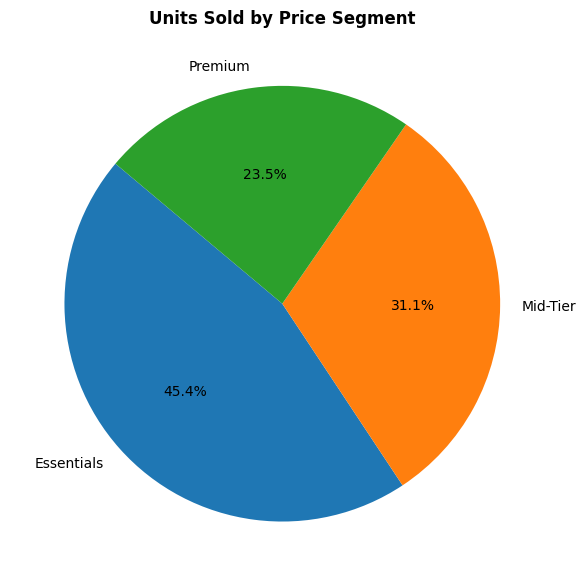

In [10]:
# Group total units sold per price segment (based on original prices)
units_per_segment = df.groupby("Segment_Before")["Units Sold"].sum()

# Reorder for consistent label flow
units_per_segment = units_per_segment.reindex(["Essentials", "Mid-Tier", "Premium"])

# Create a pie chart showing segment-wise unit distribution
plt.figure(figsize=(6, 6))
plt.pie(units_per_segment, labels=units_per_segment.index, autopct='%1.1f%%', startangle=140)

# Title and layout adjustment
plt.title("Units Sold by Price Segment", weight='bold')
plt.tight_layout()
plt.show()

## 11. Units Sold vs. Price Positioning (Bar Plot)

This chart shows how each brand performed in terms of units sold, with bar colors indicating the **price difference vs. competitors**:

- Blue bars → **Priced lower than competitor**
- Red bars → **Priced higher than competitor**

By sorting the brands by sales volume, we can observe if underpricing correlates with higher unit sales — a key insight for pricing strategy.

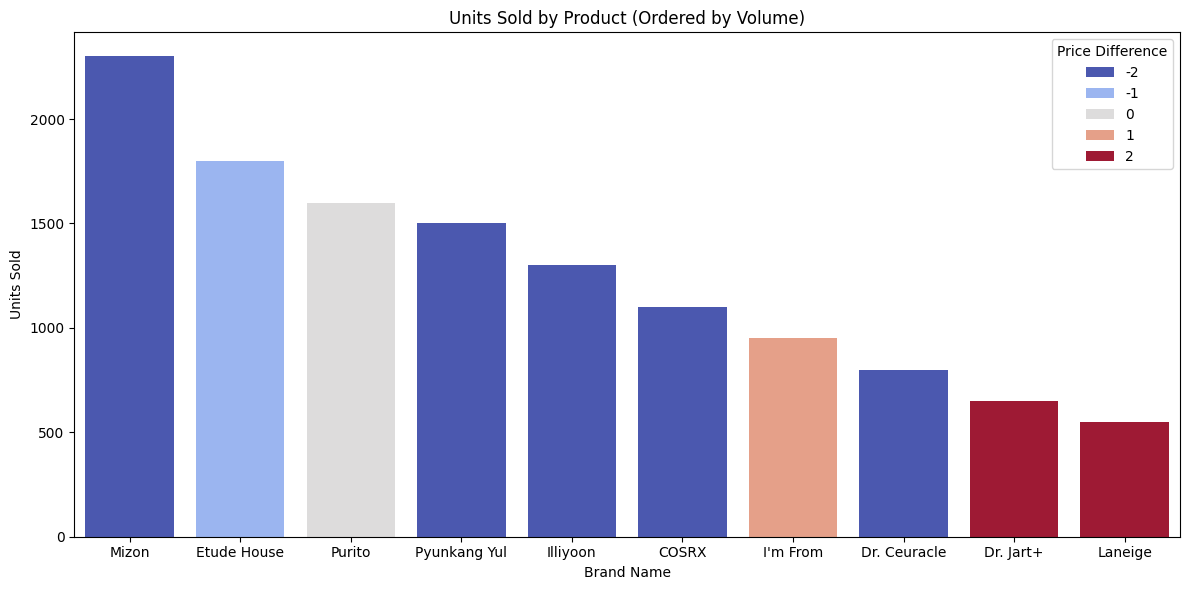

In [11]:
# Sort the DataFrame by Units Sold in descending order
sorted_df = df.sort_values(by="Units Sold", ascending=False)

# Set figure size
plt.figure(figsize=(12, 6))
sns.barplot(
    data=sorted_df,
    x="Brand",
    y="Units Sold",
    hue="Price Difference",  # Make sure this column exists
    palette="coolwarm",
    dodge=False
)

#plt.xticks(rotation=45, ha="right")
plt.title("Units Sold by Product (Ordered by Volume)")
plt.xlabel("Brand Name")
plt.ylabel("Units Sold")
plt.tight_layout()
plt.show()

## 12. KPI Improvement: Impact of New Pricing Strategy

This bar chart illustrates the **percentage gains** achieved through the proposed pricing adjustments:

- **Revenue** increased by ~1.67%
- **Net Profit** increased by ~4.22%
- **Profit Margin** rose by nearly 1 percentage point

Even small strategic price changes led to meaningful financial improvements — a win for both top-line and bottom-line growth.

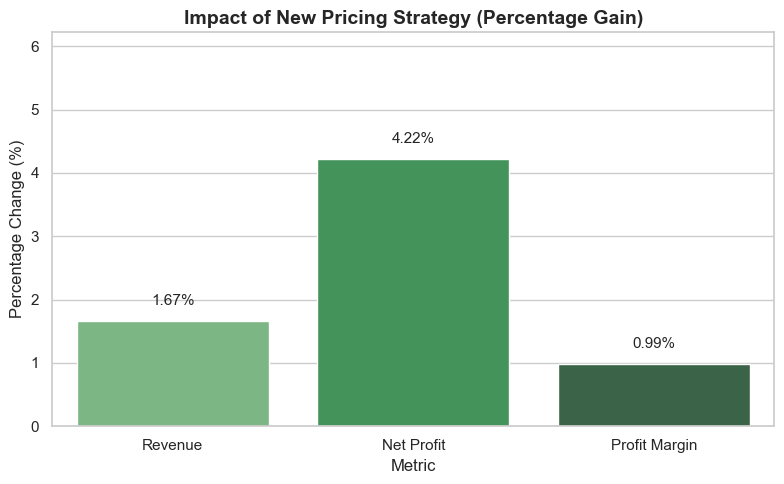

In [12]:
# Set Seaborn theme for a clean visual style
sns.set(style="whitegrid")

# Define core performance metrics
metrics = ['Revenue', 'Net Profit', 'Profit Margin']

# Calculate percentage improvement for each metric after pricing update
percent_changes = [
    ((332350 - 326900) / 326900) * 100,   # Revenue change
    ((134650 - 129200) / 129200) * 100,   # Net profit change
    (40.51 - 39.52)                       # Margin improvement in percentage points
]

# Create a DataFrame to support clean plotting
df_kpis = pd.DataFrame({
    "Metric": metrics,
    "Change (%)": percent_changes
})

# Create bar chart of KPI gains
plt.figure(figsize=(8, 5))
bars = sns.barplot(data=df_kpis, x="Metric", y="Change (%)", hue="Metric", palette='Greens_d', legend=False)

# Add percentage labels above bars
for i, pct in enumerate(percent_changes):
    bars.text(i, pct + 0.2, f"{pct:.2f}%", ha='center', va='bottom', fontsize=11)

# Final formatting
plt.title("Impact of New Pricing Strategy (Percentage Gain)", fontsize=14, weight='bold')
plt.ylabel("Percentage Change (%)")
plt.ylim(0, max(percent_changes) + 2)
plt.tight_layout()
plt.show()

## 13. Segment-Wise Net Profit: Before vs After Pricing Strategy

This grouped bar chart shows how **net profit changed across segments** after implementing the pricing update.

- **Essentials** and **Mid-Tier** products saw a meaningful rise in net profit.
- **Premium** products experienced a profit decline, primarily due to price cuts aimed at improving competitiveness and discoverability.

While profit dipped in the Premium segment, the gains from Essentials and Mid-Tier products **more than offset the loss**, validating a strategic balance between competitive pricing and margin optimization.

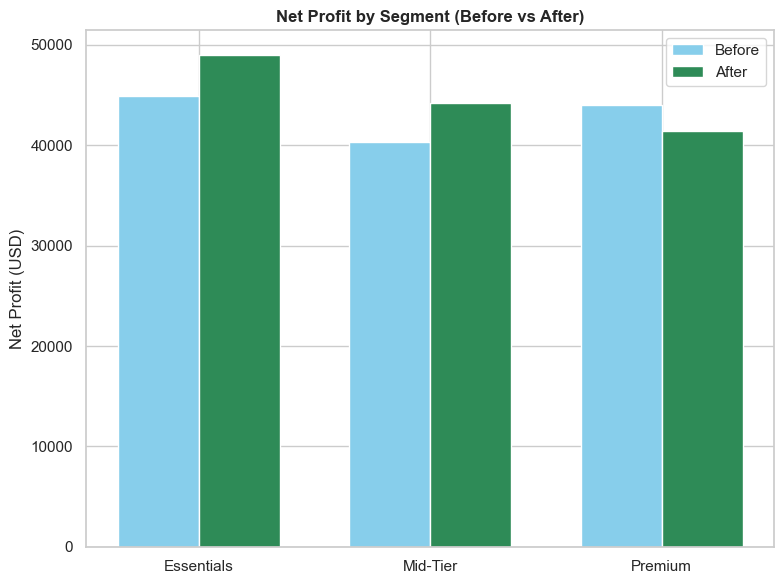

In [13]:
# Group total net profit by segment using original and new pricing
profit_before = df.groupby("Segment_Before")["Net Profit (USD)"].sum()
profit_after = df.groupby("Segment_After")["New Net Profit (USD)"].sum()

# Ensure segment order consistency
segments = ["Essentials", "Mid-Tier", "Premium"]
before_vals = [profit_before.get(seg, 0) for seg in segments]
after_vals = [profit_after.get(seg, 0) for seg in segments]

# Set bar positions and width
x = np.arange(len(segments))
width = 0.35

# Create grouped bar chart
fig, ax = plt.subplots(figsize=(8, 6))
bars1 = ax.bar(x - width/2, before_vals, width, label='Before', color='skyblue')
bars2 = ax.bar(x + width/2, after_vals, width, label='After', color='seagreen')

# Set chart details
ax.set_ylabel("Net Profit (USD)")
ax.set_title("Net Profit by Segment (Before vs After)", weight='bold')
ax.set_xticks(x)
ax.set_xticklabels(segments)
ax.legend()
plt.tight_layout()
plt.show()

## 14. Revenue Change by Segment (After Pricing Strategy)

This chart compares the **absolute change in revenue** across product segments following the new pricing strategy.

- **Essentials** and **Mid-Tier** segments delivered strong revenue growth — driven by moderate price increases without affecting unit sales.
- **Premium** products showed a drop in revenue due to deliberate price cuts aimed at increasing product visibility and accessibility.

The **overall net gain** confirms that strategic reductions in one segment can be compensated by **targeted increases in high-volume segments**, supporting a more balanced and customer-aligned pricing model.

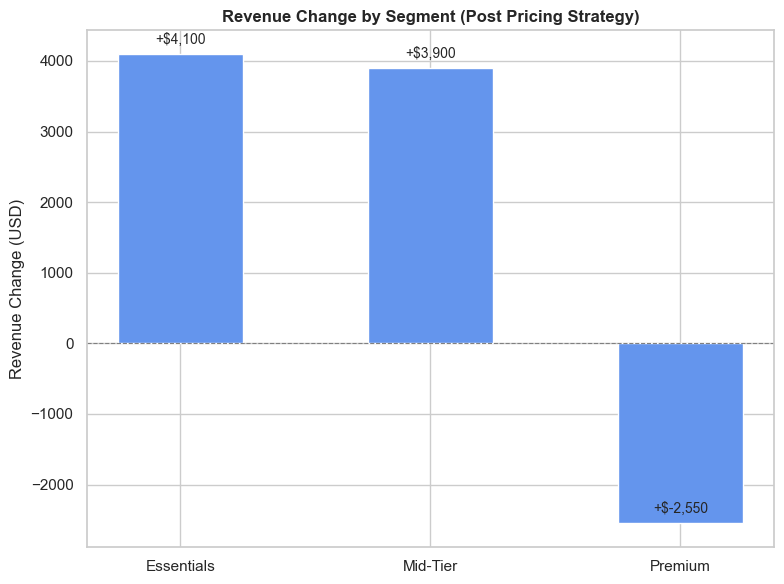

In [14]:
# Group total revenue by segment before and after pricing change
rev_before = df.groupby("Segment_Before")["Revenue (USD)"].sum()
rev_after = df.groupby("Segment_After")["New Revenue (USD)"].sum()

# Calculate revenue delta per segment
revenue_change = rev_after - rev_before

# Ensure consistent order of segments
segments = ["Essentials", "Mid-Tier", "Premium"]
rev_deltas = [revenue_change.get(seg, 0) for seg in segments]

# Bar chart setup
x = np.arange(len(segments))
width = 0.5

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(x, rev_deltas, width, color='cornflowerblue')

# Annotate bars with change values
for i, val in enumerate(rev_deltas):
    ax.text(i, val + 100, f"+${val:,.0f}", ha='center', va='bottom', fontsize=10)

# Add horizontal reference line and labels
ax.axhline(0, color='gray', linewidth=0.8, linestyle='--')
ax.set_ylabel("Revenue Change (USD)")
ax.set_title("Revenue Change by Segment (Post Pricing Strategy)", weight='bold')
ax.set_xticks(x)
ax.set_xticklabels(segments)

plt.tight_layout()
plt.show()

## 15. Promotional Campaign Simulation: "Subscribe & Save"

We simulate a promotional strategy where 30% of buyers opt into a subscription program that offers a 5% discount.  
The goal is to evaluate how this affects profit compared to old and new pricing.

The stacked bar chart below shows:
- **Gray**: Profit at original price
- **Green**: Profit at new price
- **Blue/Orange**: Profit split between regular and subscription buyers

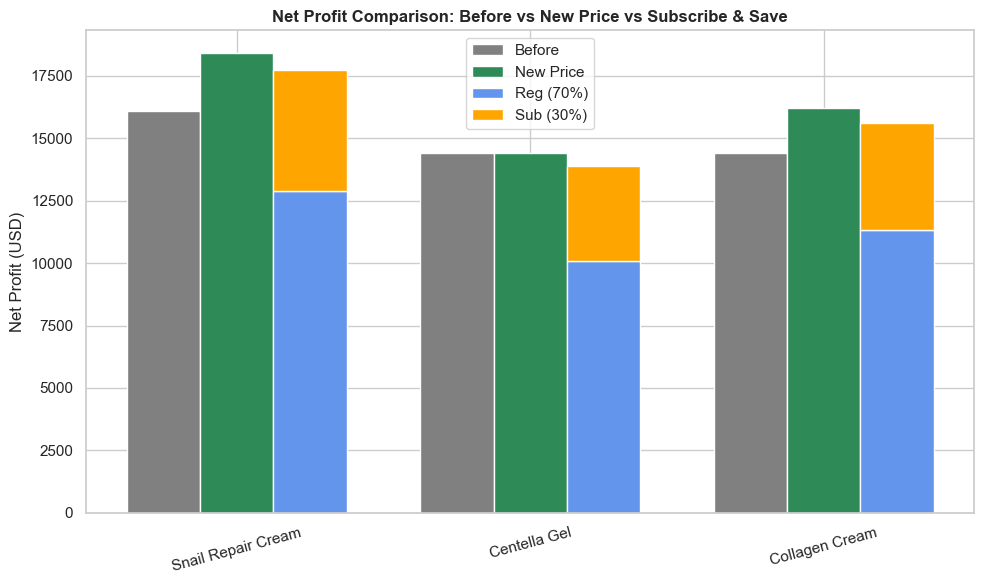

In [15]:
# Data for selected high-volume products
products = ["Snail Repair Cream", "Centella Gel", "Collagen Cream"]
units = [2300, 1600, 1800]
costs = [11, 13, 13]
old_prices = [18, 22, 21]
new_prices = [19, 22, 22]

# Calculate discounted subscription prices (5% off)
sub_prices = [p * 0.95 for p in new_prices]
subscribe_share = 0.3   # 30% buyers subscribe

# Profit calculation
profit_before = [(p - c) * u for p, c, u in zip(old_prices, costs, units)]
profit_new = [(p - c) * u for p, c, u in zip(new_prices, costs, units)]

# Mixed strategy: 70% regular + 30% subscription
profit_mixed_reg = []
profit_mixed_sub = []

for new_p, sub_p, c, u in zip(new_prices, sub_prices, costs, units):
    reg_u = int(u * (1 - subscribe_share))
    sub_u = int(u * subscribe_share)
    profit_mixed_reg.append((new_p - c) * reg_u)
    profit_mixed_sub.append((sub_p - c) * sub_u)

# Visualization
x = np.arange(len(products))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))

# Plot profit bars for different pricing models
bars1 = ax.bar(x - width, profit_before, width, label='Before', color='gray')
bars2 = ax.bar(x, profit_new, width, label='New Price', color='seagreen')
bars3a = ax.bar(x + width, profit_mixed_reg, width, label='Reg (70%)', color='cornflowerblue')
bars3b = ax.bar(x + width, profit_mixed_sub, width, bottom=profit_mixed_reg, label='Sub (30%)', color='orange')

# Labels and formatting
ax.set_ylabel("Net Profit (USD)")
ax.set_title("Net Profit Comparison: Before vs New Price vs Subscribe & Save", weight='bold')
ax.set_xticks(x)
ax.set_xticklabels(products, rotation=15)
ax.legend()
plt.tight_layout()
plt.show()